In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('ColumnFinal2.csv')
x=df.drop('Label',axis=1)
y=df.Label
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
class JK(nn.Module):
    def __init__(self,units):
        super(JK, self).__init__()
        self.units = units
        self.state_size = units
        self.j_h = nn.Linear(self.units)
        self.j_x = nn.Linear(self.units)
        self.k_h = nn.Linear(self.units)
        self.k_x = nn.Linear(self.units)
    def call(self,inputs, states):
        prev_output = states[0]
        j = nn.sigmoid(self.j_x(inputs) + self.j_h(prev_output))
        k = nn.sigmoid(self.k_x(inputs) + self.k_h(prev_output))
        output = j * (1 - prev_output) + (1 - k) * prev_output
        return output, [output]
# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(47, 84)
        self.fc2 = nn.Linear(84, 152)
        self.fc3 = nn.Linear(152, 93)
        self.fc4 = nn.Linear(93, 75)
        self.fc5 = nn.Linear(75, 123)
        self.fc6 = nn.Linear(123, 89)
        self.fc7 = nn.Linear(89, 40)
        self.fc8 = nn.Linear(40, 15)
        self.fc9 = nn.Linear(15, 1)
        self.tanh = nn.Tanh()
        self.relu = nn.ReLU()
        self.lrelu = nn.LeakyReLU()
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.lrelu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.sigmoid(self.fc5(x))
        x = self.lrelu(self.fc6(x))
        x = self.relu(self.fc7(x))
        x = self.lrelu(self.fc8(x))
        x = self.sigmoid(self.fc9(x))
        return x

# Load and preprocess the dataset
# Assuming you have your data in a NumPy array called 'data'
data = x  # Your dataset with shape (913, 23)
labels = y  # Your corresponding labels with shape (913,)
data = np.array(data)
labels = np.array(labels)

# Split the dataset into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Add an extra dimension for the output
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)


# Create PyTorch DataLoader for efficient batch processing
batch_size = 64
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
# Define the neural network model
model = NeuralNetwork()



device=torch.device( "cpu")
model.to(device)
 
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.001,momentum=0.9)



In [41]:
eval_losses=[]
eval_accu=[]
 
def test(epoch):
    model.eval()
    running_loss=0
    correct=0
    total=0
    with torch.no_grad():
        for data in (test_loader):
            images,labels=data[0].to(device),data[1].to(device)
            outputs=model(images)
            loss= loss_fn(outputs,labels)
            running_loss+=loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    test_loss=running_loss/len(test_loader)
    accu=correct/total
    eval_losses.append(test_loss)
    eval_accu.append(accu)
    print('Test Loss: %.3f | Accuracy: %.3f'%(test_loss,accu)) 

In [40]:
train_accu = []
train_losses = []
def train(epoch):
    print('\nEpoch : %d'%epoch)
    model.train()
    running_loss=0
    correct=0
    total=0
    for data in tqdm(train_loader):
        inputs,labels=data[0].to(device),data[1].to(device)
        optimizer.zero_grad()
        outputs=model(inputs)
        loss=loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    
    train_loss=running_loss/len(train_loader)
    accu=correct/total
    train_accu.append(accu)
    train_losses.append(train_loss)
    print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

In [42]:
from tqdm.auto import tqdm

epochs=100
for epoch in range(1,epochs+1): 
    train(epoch)
    test(epoch)


Epoch : 1


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.631
Test Loss: 0.000 | Accuracy: 29.749

Epoch : 2


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.578
Test Loss: 0.000 | Accuracy: 30.044

Epoch : 3


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.738
Test Loss: 0.000 | Accuracy: 29.650

Epoch : 4


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.578
Test Loss: 0.000 | Accuracy: 29.995

Epoch : 5


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.631
Test Loss: 0.000 | Accuracy: 29.945

Epoch : 6


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.471
Test Loss: 0.000 | Accuracy: 29.945

Epoch : 7


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.417
Test Loss: 0.000 | Accuracy: 29.552

Epoch : 8


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.578
Test Loss: 0.000 | Accuracy: 29.699

Epoch : 9


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.417
Test Loss: 0.000 | Accuracy: 29.503

Epoch : 10


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.471
Test Loss: 0.000 | Accuracy: 29.798

Epoch : 11


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.257
Test Loss: 0.000 | Accuracy: 29.945

Epoch : 12


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.203
Test Loss: 0.000 | Accuracy: 29.601

Epoch : 13


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.738
Test Loss: 0.000 | Accuracy: 29.798

Epoch : 14


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.471
Test Loss: 0.000 | Accuracy: 29.699

Epoch : 15


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.631
Test Loss: 0.000 | Accuracy: 29.896

Epoch : 16


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.364
Test Loss: 0.000 | Accuracy: 29.699

Epoch : 17


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.631
Test Loss: 0.000 | Accuracy: 29.699

Epoch : 18


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.738
Test Loss: 0.000 | Accuracy: 29.650

Epoch : 19


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.364
Test Loss: 0.000 | Accuracy: 29.798

Epoch : 20


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.364
Test Loss: 0.000 | Accuracy: 30.044

Epoch : 21


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.471
Test Loss: 0.000 | Accuracy: 29.749

Epoch : 22


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.631
Test Loss: 0.000 | Accuracy: 29.945

Epoch : 23


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.578
Test Loss: 0.000 | Accuracy: 29.749

Epoch : 24


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.471
Test Loss: 0.000 | Accuracy: 30.044

Epoch : 25


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.417
Test Loss: 0.000 | Accuracy: 29.749

Epoch : 26


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.684
Test Loss: 0.000 | Accuracy: 29.650

Epoch : 27


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.257
Test Loss: 0.000 | Accuracy: 30.142

Epoch : 28


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.471
Test Loss: 0.000 | Accuracy: 29.847

Epoch : 29


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.631
Test Loss: 0.000 | Accuracy: 29.699

Epoch : 30


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.738
Test Loss: 0.000 | Accuracy: 29.503

Epoch : 31


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.417
Test Loss: 0.000 | Accuracy: 29.896

Epoch : 32


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.471
Test Loss: 0.000 | Accuracy: 29.601

Epoch : 33


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.471
Test Loss: 0.000 | Accuracy: 29.699

Epoch : 34


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.684
Test Loss: 0.000 | Accuracy: 29.896

Epoch : 35


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.417
Test Loss: 0.000 | Accuracy: 29.749

Epoch : 36


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.524
Test Loss: 0.000 | Accuracy: 29.847

Epoch : 37


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.578
Test Loss: 0.000 | Accuracy: 29.699

Epoch : 38


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.791
Test Loss: 0.000 | Accuracy: 29.749

Epoch : 39


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.578
Test Loss: 0.000 | Accuracy: 29.699

Epoch : 40


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.578
Test Loss: 0.000 | Accuracy: 29.896

Epoch : 41


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.631
Test Loss: 0.000 | Accuracy: 29.847

Epoch : 42


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.578
Test Loss: 0.000 | Accuracy: 30.093

Epoch : 43


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.417
Test Loss: 0.000 | Accuracy: 29.798

Epoch : 44


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.738
Test Loss: 0.000 | Accuracy: 29.749

Epoch : 45


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.631
Test Loss: 0.000 | Accuracy: 29.798

Epoch : 46


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.471
Test Loss: 0.000 | Accuracy: 29.945

Epoch : 47


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.310
Test Loss: 0.000 | Accuracy: 29.847

Epoch : 48


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.471
Test Loss: 0.000 | Accuracy: 29.749

Epoch : 49


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.684
Test Loss: 0.000 | Accuracy: 29.995

Epoch : 50


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.364
Test Loss: 0.000 | Accuracy: 29.896

Epoch : 51


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.471
Test Loss: 0.000 | Accuracy: 29.798

Epoch : 52


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.364
Test Loss: 0.000 | Accuracy: 29.650

Epoch : 53


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.364
Test Loss: 0.000 | Accuracy: 29.945

Epoch : 54


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.417
Test Loss: 0.000 | Accuracy: 29.749

Epoch : 55


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.310
Test Loss: 0.000 | Accuracy: 29.650

Epoch : 56


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.417
Test Loss: 0.000 | Accuracy: 29.847

Epoch : 57


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.791
Test Loss: 0.000 | Accuracy: 29.896

Epoch : 58


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.578
Test Loss: 0.000 | Accuracy: 29.699

Epoch : 59


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.791
Test Loss: 0.000 | Accuracy: 29.650

Epoch : 60


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.631
Test Loss: 0.000 | Accuracy: 29.699

Epoch : 61


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.471
Test Loss: 0.000 | Accuracy: 29.552

Epoch : 62


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.310
Test Loss: 0.000 | Accuracy: 29.896

Epoch : 63


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.738
Test Loss: 0.000 | Accuracy: 29.896

Epoch : 64


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.684
Test Loss: 0.000 | Accuracy: 29.995

Epoch : 65


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.578
Test Loss: 0.000 | Accuracy: 30.044

Epoch : 66


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.631
Test Loss: 0.000 | Accuracy: 29.749

Epoch : 67


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.898
Test Loss: 0.000 | Accuracy: 29.896

Epoch : 68


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.578
Test Loss: 0.000 | Accuracy: 29.749

Epoch : 69


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.471
Test Loss: 0.000 | Accuracy: 29.749

Epoch : 70


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.524
Test Loss: 0.000 | Accuracy: 29.601

Epoch : 71


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.310
Test Loss: 0.000 | Accuracy: 29.798

Epoch : 72


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.631
Test Loss: 0.000 | Accuracy: 29.945

Epoch : 73


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.364
Test Loss: 0.000 | Accuracy: 29.650

Epoch : 74


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.471
Test Loss: 0.000 | Accuracy: 29.699

Epoch : 75


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.631
Test Loss: 0.000 | Accuracy: 29.699

Epoch : 76


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.578
Test Loss: 0.000 | Accuracy: 29.552

Epoch : 77


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.417
Test Loss: 0.000 | Accuracy: 29.896

Epoch : 78


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.471
Test Loss: 0.000 | Accuracy: 29.995

Epoch : 79


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.524
Test Loss: 0.000 | Accuracy: 30.093

Epoch : 80


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.684
Test Loss: 0.000 | Accuracy: 29.847

Epoch : 81


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.471
Test Loss: 0.000 | Accuracy: 29.798

Epoch : 82


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.791
Test Loss: 0.000 | Accuracy: 29.995

Epoch : 83


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.631
Test Loss: 0.000 | Accuracy: 29.896

Epoch : 84


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.471
Test Loss: 0.000 | Accuracy: 29.798

Epoch : 85


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.578
Test Loss: 0.000 | Accuracy: 29.552

Epoch : 86


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.578
Test Loss: 0.000 | Accuracy: 29.798

Epoch : 87


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.471
Test Loss: 0.000 | Accuracy: 29.749

Epoch : 88


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.738
Test Loss: 0.000 | Accuracy: 29.945

Epoch : 89


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.578
Test Loss: 0.000 | Accuracy: 30.044

Epoch : 90


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.364
Test Loss: 0.000 | Accuracy: 29.945

Epoch : 91


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.524
Test Loss: 0.000 | Accuracy: 29.896

Epoch : 92


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.524
Test Loss: 0.000 | Accuracy: 29.896

Epoch : 93


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.364
Test Loss: 0.000 | Accuracy: 29.798

Epoch : 94


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.684
Test Loss: 0.000 | Accuracy: 29.650

Epoch : 95


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.417
Test Loss: 0.000 | Accuracy: 29.699

Epoch : 96


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.631
Test Loss: 0.000 | Accuracy: 29.847

Epoch : 97


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.471
Test Loss: 0.000 | Accuracy: 29.650

Epoch : 98


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.631
Test Loss: 0.000 | Accuracy: 29.650

Epoch : 99


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.578
Test Loss: 0.000 | Accuracy: 29.699

Epoch : 100


  0%|          | 0/12 [00:00<?, ?it/s]

Train Loss: 0.000 | Accuracy: 31.738
Test Loss: 0.000 | Accuracy: 29.847


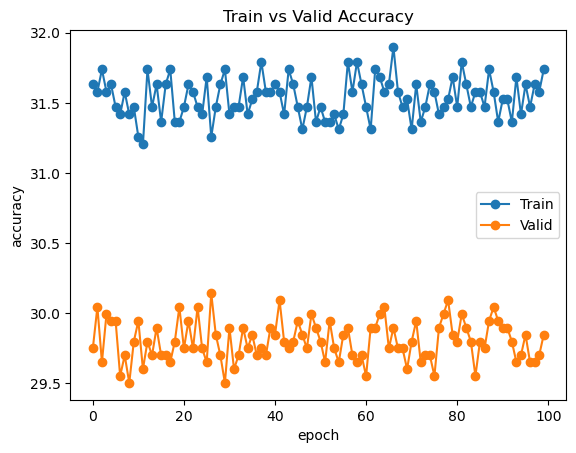

In [43]:
import matplotlib.pyplot as plt
plt.plot(train_accu,'-o')
plt.plot(eval_accu,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Accuracy')
 
plt.show()